## Final Project Submission

Please fill out:
* Student name: ***Israel Wasike Kahayi***
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Samuel Jane
* Blog post URL:


### Business problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### 1. Import necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading the CSV file:

In [4]:
#load IMDB basics data

imdb_title_basics = pd.read_csv('title.basics.csv')

Now the data is already loaded, the next steps involves inspecting the data, cleaning and performing EDA

### Inspecting the data¶

Loaded DataFrame is inspected to understand its structure and content

In [5]:
# inspect the loaded data
# inspecting the first few rows of the title basic data frame
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Displaying summary statistics for the dataframe

In [6]:
print(imdb_title_basics.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None 



### Checking for duplicate rows

To check for duplicate rows in a pandas DataFrame, the .duplicated() method is used. Here's how the method is applied to identify and handle duplicate rows in the DataFrame.

In [7]:
# checking whether there are duplicates in the dataframe
print("Number of duplicate rows in imdb_title_basics is:",imdb_title_basics.duplicated().sum(),"\n")


Number of duplicate rows in imdb_title_basics is: 0 



### Check for duplicate columns

In [8]:
#similar to checking for duplicate rows, the same method will be employed here:
# '.duplicated()' method will be used.

# For imdb_title_basics
imdbbasics_duplicate_columns = imdb_title_basics.columns.duplicated().sum()
print("Number of duplicate columns in imdb_title_basics :", imdbbasics_duplicate_columns)



Number of duplicate columns in imdb_title_basics : 0


### Shape of the DataFrame

In [9]:
dataframe_name = 'imdb_title_basics'

print(f"Shape of {dataframe_name}:")
print(imdb_title_basics.shape, "\n")


Shape of imdb_title_basics:
(146144, 6) 



### Checking for missing values in the DataFrames

When checking for any missing values in a dataframe, the .isnull().
.isnull() is a method used for checking missing values in a dataframe not a function.
missung values/ null values are denoted by NaN which means not a number

In [10]:
# .isnull() checks for any missing values and returns a boolean true or false
# where true = the missing value and false = no missing value. 
#but in this case, i want to know the total number of missing values in every colum, thats where .sum() is used.
#.sum() adds all the boolean(true) and guves out a number eg. 5, 10, 12674...

missing_values = imdb_title_basics.isnull().sum()
print('missing values in imdb title basic:')
print(missing_values,"\n")


#the output below shows the missing values
#where 0 = no missing values 
# where a number eg.3179 = the number of missing value in certain columns of the data sets. 
# some of our missing values are strings and others are integers

missing values in imdb title basic:
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64 



### Filling the null/ missing values in the dataframe

Filling null values can be done in various ways. Null values of a certain column can be filled with the mean, max or min of the column else can be filled with any random values.This is used for columns that has numbers/ interger values.
Sometimes the column with missing values has strings.

#### 1. filling missing values in imdb_title_basics dataframe

In [11]:
# filling missing values for imdb title basics 
# filling missing values in the runtime column with the median of the column 
# median of the runtime_minutes column
runtime_minutes_median = imdb_title_basics['runtime_minutes'].median()

# Fill the missing values in the 'runtime_minutes' column with the median 
imdb_title_basics['runtime_minutes'] = imdb_title_basics['runtime_minutes'].fillna(runtime_minutes_median)
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [12]:
# filling different null values in the "original title" and "genres" columns
# Filling missing values in 'original_title' column with 'unknown'
imdb_title_basics['original_title'] = imdb_title_basics['original_title'].fillna('unknown')

# Fill missing values in 'genres' column with 'unknown'
imdb_title_basics['genres'] = imdb_title_basics['genres'].fillna('unknown')

Checking for missing values again, this is to make sure the dataframe has no missing values

In [13]:
#check for missing values again
# if it retuens a value count of: 0 = no missing value
# else if it returns a value count of any number = number of missing values

missing_values = imdb_title_basics.isnull().sum()
print("Missing values in imdb title basics:")
print(missing_values)

# there are no missing values in imdb_title_basics dataframe.
# the missing vales were in the 'runtime_minutes', 'genre, and 'original_title' columns are seen in the above cell

Missing values in imdb title basics:
tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [14]:
imdb_title_basics 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,unknown


### Descriptive satistics

In [15]:
imdb_title_basics.describe().T#.T is used to transpose the data frame

,count,mean,std,min,25%,50%,75%,max
start_year,146144.0,2014.621798,2.733583,2010.0,2012.0,2015.0,2017.0,2115.0
runtime_minutes,146144.0,86.363758,147.191650,1.0,75.0,87.0,95.0,51420.0


In [16]:
imdb_title_basics.describe(include = object)

,tconst,primary_title,original_title,genres
count,146144,146144,146144,146144
unique,146144,136071,137774,1086
top,tt10214540,Home,unknown,Documentary
freq,1,24,21,32185


in the above info, it is seen that in the primary_title column there are 136,071 unique values, in the original title there 137,774 unique values and in the genres column there are 1,086 unique values

### Identifying movies with long, short and mid-length runtime

In [17]:
# Movies with short,long and mid length runtimes
short_movies = imdb_title_basics[imdb_title_basics['runtime_minutes'] < 60] #for short movies below 60 min but not including 60

long_movies = imdb_title_basics[imdb_title_basics['runtime_minutes'] > 100]# for long movies above 100 min but not including 100

mid_runtime_movies = imdb_title_basics[(imdb_title_basics['runtime_minutes'] >=60) & (imdb_title_basics['runtime_minutes'] <=100)]
#this are for movies between runtime minutes of 60 and 100

print("SHORT MOVIES, 60 MINUTES & BELOW:")
print(short_movies[['primary_title', 'runtime_minutes']],"\n")

print("LONG MOVIES, 100 MINUTES & ABOVE:")
print(long_movies[['primary_title', 'runtime_minutes']], "\n")

print("MID RUNTIME MOVIES, BETWEEN 60 & 100 MINUTES ")
print(mid_runtime_movies[[ 'primary_title', 'runtime_minutes']])


SHORT MOVIES, 60 MINUTES & BELOW:
                                        primary_title  runtime_minutes
24                                  Akakis mogzauroba             44.0
25                           Seven Jews from My Class             40.0
28               Prague: The Restless Heart of Europe             59.0
29                                  Short Time Heroes             45.0
37             Quantum Quest: A Cassini Space Odyssey             45.0
...                                               ...              ...
146066                                        Yolanda             58.0
146075  Keukenhof Gardens and the Dutch Flower Parade             51.0
146100        Diseño de Sonido para Cine en Argentina             54.0
146116                               Nepal - Homebird             52.0
146135                                  The Rehearsal             51.0

[19186 rows x 2 columns] 

LONG MOVIES, 100 MINUTES & ABOVE:
                             primary_title  runtime_

### Short movies histogram

Text(0.5, 1.0, 'Distribution of short movies runtime')

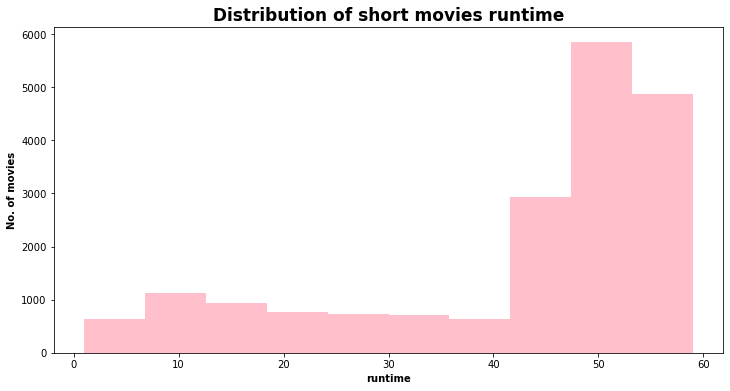

In [18]:
# Short movies histogram
plt.figure(figsize=(12, 6))
plt.hist(short_movies['runtime_minutes'], label='Short Movies', color = 'pink')
plt.xlabel('runtime', fontweight = 'bold')
plt.ylabel('No. of movies', fontweight = 'bold')
plt.title('Distribution of short movies runtime', fontweight = 'bold', fontsize = 17)

The chart displays a spike, between the 50 to 60 minute mark implying that many short films fall within this time frame. Conversely there is a scarcity of movies lasting than 30 minutes hinting that shorter films usually exceed this duration

### Long movies histogram

Text(0.5, 1.0, 'Distribution of long movies runtime')

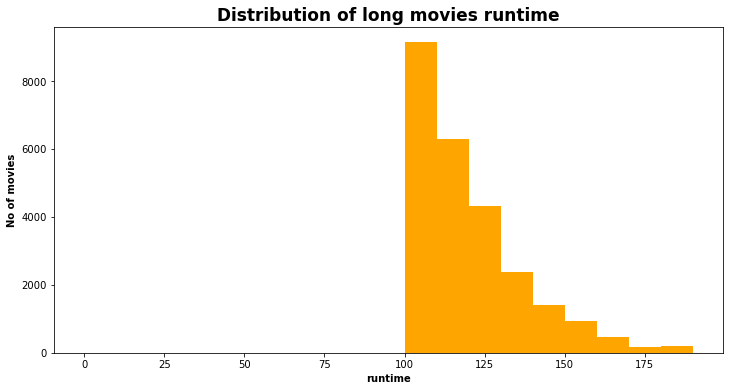

In [19]:
plt.figure(figsize=(12, 6))
plt.hist(long_movies['runtime_minutes'], bins=range(0, 200, 10), label='Long Movies', color = 'orange')
plt.xlabel('runtime', fontweight = 'bold')
plt.ylabel('No of movies', fontweight = 'bold')
plt.title('Distribution of long movies runtime', fontweight = 'bold', fontsize = 17)


Movies tend to cluster around the 90 to 100-minute mark, which seems to be the sweet spot for longer films.After that, you see fewer and fewer movies as the runtime stretches on. Looks like filmmakers aren't too keen on keeping audiences in their seats for ages!

### Mid-length movies histogram

Text(0.5, 1.0, 'Distribution of mid-length movie runtimes')

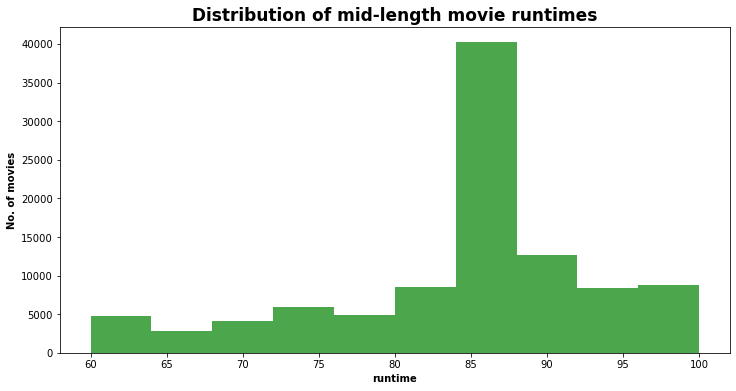

In [20]:
# mid lenght movies histogram
plt.figure(figsize=(12, 6))
plt.hist(mid_runtime_movies['runtime_minutes'], label='mid runtime movies', color = 'green', alpha = 0.7)
# 'alpha' often refers to the opacity level of the plotted elements/ color
plt.xlabel('runtime', fontweight = 'bold')
plt.ylabel('No. of movies', fontweight = 'bold')
plt.title('Distribution of mid-length movie runtimes', fontweight = 'bold', fontsize = 17)

The histogram indicates that movies of length (, with durations falling between 60 and 100 minutes) tend to be 85 minutes long most often. This pattern implies that films of this duration are popular which could be due, to industry standards or audience preference.

### Histogram to understand the distribution of data

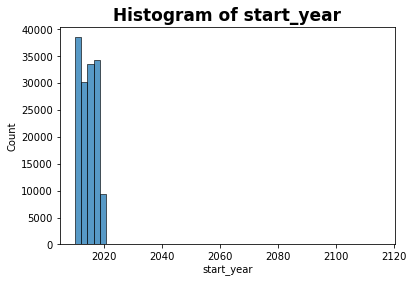

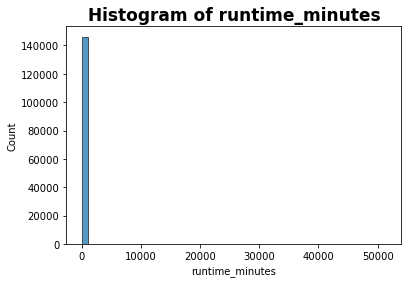

In [21]:
for i in imdb_title_basics.select_dtypes(include="number").columns:
    sns.histplot(data = imdb_title_basics, x = i, bins = 50)
    plt.title(f"Histogram of {i}", fontweight= 'bold', fontsize = 17)
    plt.show()

### Check the Data Distribution

In [22]:
for columns in imdb_title_basics.select_dtypes(include="number").columns:
    print(imdb_title_basics[columns].describe(), "\n")


count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64 

count    146144.000000
mean         86.363758
std         147.191650
min           1.000000
25%          75.000000
50%          87.000000
75%          95.000000
max       51420.000000
Name: runtime_minutes, dtype: float64 



### Boxplot to identify the outliers :

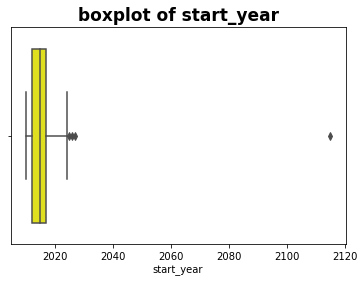

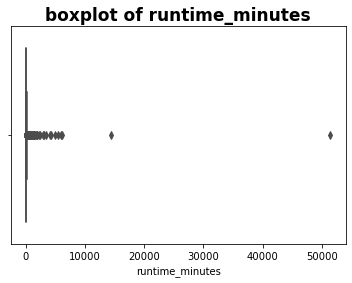

In [23]:
for i in imdb_title_basics.select_dtypes(include="number").columns: #this plots only from columns that has numbers
    sns.boxplot(data = imdb_title_basics, x = i, color = 'yellow') 
    plt.title(f"boxplot of {i}", fontweight = 'bold' , fontsize = 17)
    plt.show()

### Bar gragph to understand the movie genre distribution

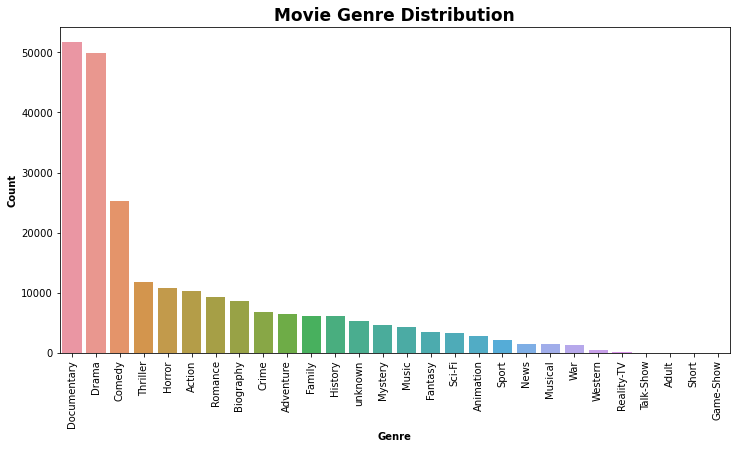

In [24]:
# start of by Spliting the 'genres' column into rows
# this includes the genre that were grouped together (action,thriller,adult) after spliting, they will be individual raws
# eg.1.action
#    2.thriller
#    3.adult
# for this to happen, .explode() is used and assigned a parameter "genre". 
# Spliting the "genres" column into rows
imdb_title_basics_genres = imdb_title_basics.assign(genres=imdb_title_basics['genres'].str.split(',')).explode('genres')

# Counting the number of movies in each genre
movie_genre_counts = imdb_title_basics_genres['genres'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=movie_genre_counts.index, y=movie_genre_counts.values)
plt.title('Movie Genre Distribution', fontweight = 'bold', fontsize = 17)
plt.xticks(rotation=90)
plt.xlabel('Genre', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.show()

Documentaries take the lead with, over 50,000 movies making it the popular genre. Following behind is Drama with a number of films in its category. Comedy also holds a presence although not as abundant as drama. The chart showcases a range of genres like thriller, action, romance, biography, adventure, history, mystery, fantasy, animation and more each, with decreasing numbers of movies.

### Line graph showing nmber of movies released over time

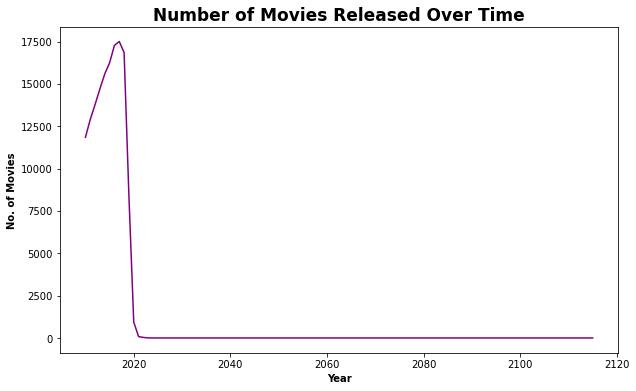

In [25]:
yearly_counts = imdb_title_basics['start_year'].value_counts().sort_index()
# .value_counts() - counts how many times each unique year appears in the start_year column.
# .sort_index()  - this sorts the years in order.it sorts them in ascending order (from the oldest to the newest).
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, color ='purple')
plt.title('Number of Movies Released Over Time', fontsize = 17, fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('No. of Movies', fontweight = 'bold')
plt.show()

The number of films released in 2020 increased significantly. However, following this peak, there was a decline, indicating a decrease in movie releases in the following years.

### Correlation between year and runtime

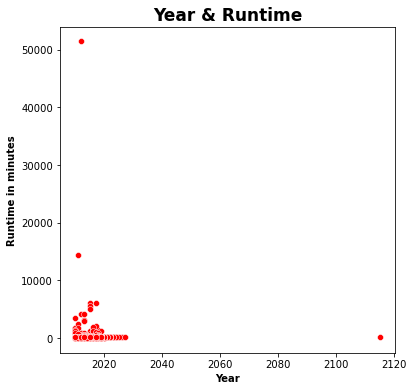

In [26]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=imdb_title_basics['start_year'], y=imdb_title_basics['runtime_minutes'], color = 'red')
plt.title('Year & Runtime', fontsize = 17, fontweight = 'bold')
plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Runtime in minutes', fontweight = 'bold')
plt.show()

The scatter plot does a job of showing how movie lengths vary over the years especially pointing out the prescence of outliers movies that're much longer, than usual.

### Age of each movie

In [27]:
import datetime

currentyear = datetime.datetime.now().year

imdb_title_basics["movie_age"] = currentyear - imdb_title_basics["start_year"]# acessing the start year column and subtracting
# the current year from the year the movies were released

print(imdb_title_basics[["primary_title", "start_year", "movie_age"]])


                                      primary_title  start_year  movie_age
0                                         Sunghursh        2013         11
1                   One Day Before the Rainy Season        2019          5
2                        The Other Side of the Wind        2018          6
3                                   Sabse Bada Sukh        2018          6
4                          The Wandering Soap Opera        2017          7
...                                             ...         ...        ...
146139                          Kuambil Lagi Hatiku        2019          5
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015          9
146141                              Dankyavar Danka        2013         11
146142                                       6 Gunn        2017          7
146143               Chico Albuquerque - Revelações        2013         11

[146144 rows x 3 columns]


### Plotting the distribution of movies age in a pie chart

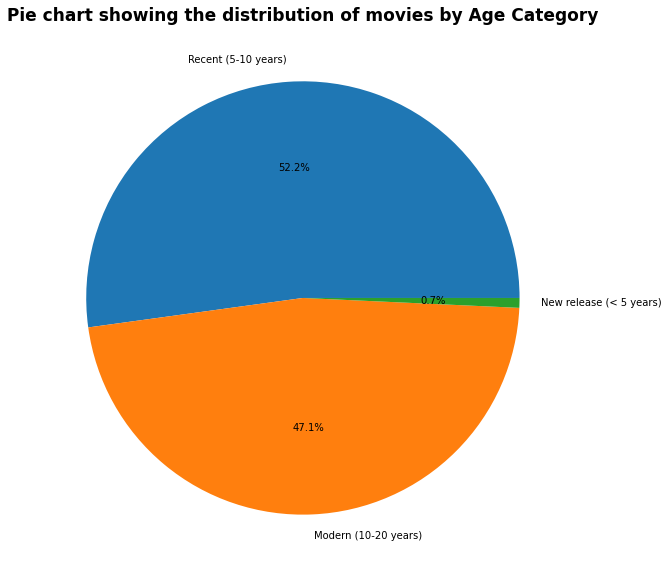

The total number of movies: 146144

The number of movies in each category:
Recent (5-10 years): 76247
Modern (10-20 years): 68834
New release (< 5 years): 1063


In [29]:
# start by creating age categories 
def age_category(Age):
    
    if Age < 5:
        return "New release (< 5 years)"
    
    elif Age < 10:
        return "Recent (5-10 years)"
    
    elif Age < 20:
        return "Modern (10-20 years)"
    
    else:
        return "Vintage (50+ years)"
    

imdb_title_basics["age_category"] = imdb_title_basics["movie_age"].apply(age_category)

# Count movies in each category
age_distribution = imdb_title_basics["age_category"].value_counts()
# ploting the pie chart
plt.figure(figsize = (9, 9))
plt.pie(age_distribution.values, labels=age_distribution.index, autopct='%1.1f%%')
plt.title("Pie chart showing the distribution of movies by Age Category", fontweight='bold',  fontsize = 17)
plt.tight_layout()
plt.show()

#aditional information 
print(f"The total number of movies: {len(imdb_title_basics)}")
print("\nThe number of movies in each category:")
for category, count in age_distribution.items():
    print(f"{category}: {count}")

The pie chart shows that most films are categorized as "Recent" or "Modern," with a number falling under the label of "New releases"

### Findings

1. The majority of short movies have runtimes between 40 and 60 minutes, with the highest concentration in the 50-55 minute range. Out of 19,186 short films under 60 minutes, this duration bracket dominates viewership.

2. Of the 25,757 long movies with runtimes of 100 minutes or more, the majority fall within the 100-125 minute range. This duration bracket represents the most common length for feature films in this category.

3. The dataset contains 100,201 mid-length movies, with runtimes between 60 and 100 minutes. Within this category, the most common duration falls in the 85-90 minute range.

4. For instance, majority of the movies have a runtime within 90 & 120 minutes range.

5. In the world of films documentaries take the lead with, over 50,000 movies making it the popular genre. Following behind is drama with a number of films in its category. Comedy also holds a presence although not as much as drama. The chart showcases a range of genres like thriller, action, romance, biography, adventure, history, mystery, fantasy, animation and more each, with decreasing numbers of movies.

### Insights & Recommendation

After analyzing the results here are a takeaways and practical recommendations.

1. it's evident that audiences have a preference, for documentaries, dramas and comedies. These movie genres are gaining increasing popularity compared to others. If Microsoft is contemplating creating a film it may want to explore one of these categories. It might be wise to align with trends and offer viewers more of what they enjoy.

2. In the past 10 years, there has been a rise, in the number of movies being released. It's important to expand production capabilities to keep up with the growth, in the industry.

3. For instance the majority of films typically fall within the 90 to 120 minute range. It would be beneficial for Microsoft to focus on creating movies that fit within this timeframe to stay in line, with industry standards.